# Neural networks: Perceptron Model

The notebook aims to study and implement the perceptron model. A synthetic dataset will be used to construct and explain the concepts.


## Acknowledgments

- Used dataset: synthetic



## Importing libraries

In [8]:
# Import the packages that we will be using
import numpy as np                  # For array
import matplotlib.pyplot as plt     # For showing plots
#import pandas as pd                 # For data handling
#import seaborn as sns               # For advanced plotting


## Create data

In [9]:
# Import library
from sklearn import datasets

# Create dataset: two variables, two classes
X, y = datasets.make_blobs(n_samples=40,n_features=2, centers=2,cluster_std=1.2, random_state=2)


## Undertanding the dataset

Get a general 'feel' of the dataset

In [10]:
# Calculate number of observations and number of features
No , Nf = X.shape

print("Number of observations = {0:0d}".format(No))
print("Number of features     = {0:0d}".format(Nf))


Number of observations = 40
Number of features     = 2


In [11]:
# Labels
np.unique(y)


array([0, 1])

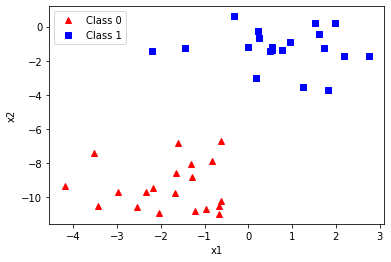

In [12]:
# Plotting training data
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'r^', label='Class 0')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs', label='Class 1')
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()


We have two features/variables: $x_1$ and $x_2$

We have two classes: red and blue; 0 and 1

The scatter plot shows that data can be clearly separated by a line

Thus, the data shows that we have a two-class or binary classifiction problem where
- Feture vector: $\mathbf{x} = [x_1,x_2]^{T}$
- Set of labels/classes: $\{c_1,c_2\}$

We can learn a classifier using the **Perceptron**

## Perceptron

The single neuron model **Perceptron** is a bi-class linear classifier

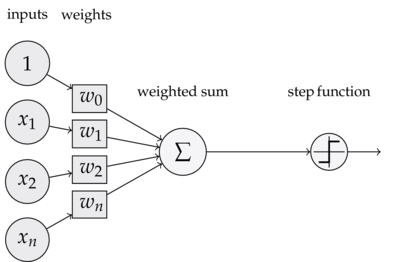

The equation for the perceptron model is:

$$ \hat{c} = f \left( w_2 \cdot x_2 + w_1 \cdot x_1 + w_0 \right) = f \left( \mathbf{w}^T \mathbf{x} \right)$$ 

where:
- $w_0$, $w_1$, and $w_2$ are the model parameter
- $f(\cdot) $ is the step function



Given a training dataset
    
$$ \mathcal{D} = \{ (\mathbf{x}_i,y_i) \}_{i=1}^{N} $$

The model parameters are learned using the **learning rule**:

$$ \mathbf{w} \Leftarrow  \mathbf{w} + \alpha \left( c_i - \hat{c}_i \right) \mathbf{x}_i $$

for all $i=1,2,...,N$

That is, for each observation the weights are
- Not updated if the observation $\mathbf{x}_i$ is correctly classified
- Updated if an observation $\mathbf{x}_i$ is incorrectly classified



Note that:
- $\alpha$ is the learning rate and account for the rate chance of the weights
- The leaning rule is applied for each of the observations in the dataset $\mathcal{D}$
- An **epoch** is the one-time application of all training data to update the weights
- We can use the training dataset multiple times to update the weights: **multiple epochs**

Since the perceptron is a linear classifier, the linear decision boundary is given by:
$$ w_2 \cdot x_2 + w_1 \cdot x_1 + w_0 = 0$$

or equivalently
$$ x_2 = - w_1 / w_2 \cdot x_1 - w_0 / w_2 $$



## Perceptron model using sklearn

Perceptron model using sklearn

In [13]:
# Import library
from sklearn.linear_model import Perceptron

# Define parameters for the learning of the perceptron model
Nepochs     = 20
alpha       = 0.5

# Create a perceptron model
perceptron1 = Perceptron(max_iter = Nepochs, eta0 = alpha)

# Train the model
perceptron1.fit(X, y)

# Get coefficients
w0 = perceptron1.intercept_[0]
w1 = perceptron1.coef_[0][0]
w2 = perceptron1.coef_[0][1]

print("w0 = {0:0.2f}".format(w0))
print("w1 = {0:0.2f}".format(w1))
print("w2 = {0:0.2f}".format(w2))


w0 = 9.00
w1 = 1.34
w2 = 2.04


Make predictions

In [19]:
# New observation
x1new = -0.2
x2new = -6.1


In [20]:
# Make predictions
cnew = perceptron1.predict([[x1new,x2new]])

print("Predicted class: {0:0d}".format(cnew[0]))


Predicted class: 0


In [22]:
# Implement our own function of the perceptron to make predictions
def My_PerceptronV1(x1,x2,w0,w1,w2):
    
    # Calculate weighted sum
    sum =  w0 + w1*x1 + w1*x2
    
    # Calculate step function
    if sum>=0:
        c = 1
    else:
        c = 0 
    return c


In [24]:
# Make predictions
cnew = My_PerceptronV1(x1new, x2new, w0, w1, w2)

print("Predicted class: {0:0d}".format(cnew))


Predicted class: 1


Plot the data and the linear decision boundary

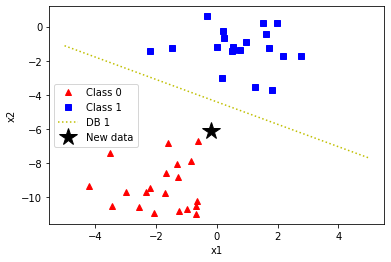

In [25]:
# Create linear descision boundary
xx       = np.linspace(-5,5,100)
m1       = -w1/w2
b1       = -w0/w2
yy       = m1*xx + b1

# Plotting training data
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'r^', label='Class 0')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs', label='Class 1')
plt.plot(xx, yy, 'y:',  label='DB 1')
plt.plot(x1new, x2new, '*k', markersize=18, label='New data')

plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()


Plot loss function: number of misclassified observations is each epoch

In [26]:
# Plot loss function: number of misclassified observations is each epoch

# perceptron1.loss_function_
# Work in progress


## Perceptron model implementation

Perceptron model implementation

In [29]:
# Perceptron learning algorithm
def My_PerceptronLearningAlgorithm(X, y, alpha, Nepochs):
    # **********************************************************
    # Description of the inputs
    # X       --> Features (Nobservations x Nfeatures)
    # y       --> Labels (Nobservations x 1)
    # alpha   --> Learning rate
    # Nepochs --> Number of epochs
    # doplot  --> A scalar (0:do not plot, 1: do plot)
    # NOTE: this current implementation only works for two features    
    
    # **********************************************************
    #print("Executing perceptron's learning algoritm ...")
    
    # **********************************************************
    # Calculate number of observations (Nob) and number of features (Nf)
    Nob, Nfe = X.shape
    #print("number of observations: {0:0d}".format(Nob))
    #print("number of features:     {0:0d}".format(Nfe))
    
    # **********************************************************
    # Initialize weights as zeros
    w0   = 0
    w1   = 0
    w2   = 0
    #weights  = np.zeros((Nfe+1,1)) #  include the bias term (w0)
    
    # **********************************************************
    # Initialize an empty list to store metric for the loss function: # observations misclassified for each epoch
    NmissPerEpoch   = []
    
    # **********************************************************
    # For each epoch:
    for epoch in range(Nepochs):
        
        # Initialize variable to store the number of misclassified observations
        Nmissclass = 0
        
        # For each observation in the training datset (X,y):
        for i, xi in enumerate(X):
            
            # Get current observation and insert a 1 for the bias term
            xi1 = xi[0]
            xi2 = xi[1]
            #xi = np.insert(xi, 0, 1)
            #xi = np.insert(xi, 0, 1).reshape(-1,1)
            
            # Calculate weighted sum for the current observation
            WeightedSum =  w0 + w1*xi1 + w2*xi2
            #WeightedSum =  np.dot(xi.T, weights)
            
            # Calculate output for the current observation
            if WeightedSum>=0:
                c_esti = 1
            else:
                c_esti = 0            
            
            # Update weights only if the the current observation is misclassified
            err = y[i] - c_esti
            if  err!=0:
                w0   += alpha*( err*1 )
                w1   += alpha*( err*xi1 )
                w2   += alpha*( err*xi2 )
                #weights  += alpha*( err*xi )
                
                # Increase the number of misclassified observations
                Nmissclass   += 1
        
        # Save the number of misclassified observations of the current epoch
        NmissPerEpoch.append(Nmissclass)
        
    
        # **********************************************************
        # Plot the data and the decision boundary for each epoch
        # JMAO: pilas trabaje duro
        
    return w0, w1, w2, NmissPerEpoch
    #return weights, NmissPerEpoch


In [31]:
# Learn the weights of the perceptron model with a custom-made function
#weights, Nmiss = My_PerceptronLearningAlgorithm(X, y, alpha, Nepochs)
#weights0       = weights[0][0]
#weights1       = weights[1][0]
#weights2       = weights[2][0]
weights0, weights1, weights2, NmissPerEpoch = My_PerceptronLearningAlgorithm(X, y, alpha, Nepochs)

# Print estimated weights
print("weights0 = {0:0.2f}".format(weights0))
print("weights1 = {0:0.2f}".format(weights1))
print("weights2 = {0:0.2f}".format(weights2))


weights0 = 6.50
weights1 = 1.29
weights2 = 1.80


Make predictions

In [32]:
# Implement our own function of the perceptron to make predictions
def My_PerceptronV2(x1,x2,weights0,weights1,weights2):
    
    # Calculate weighted sum
    sum =  w0 + w1*x1 + w1*x2
    
    # Calculate step function
    if sum>=0:
        c = 1
    else:
        c = 0 
    return c


In [33]:
# Make predictions
cnew = My_PerceptronV2(x1new, x2new, weights0, weights1, weights2)

print("Predicted class: {0:0d}".format(cnew))


Predicted class: 1


Plot the data and the linear decision boundary

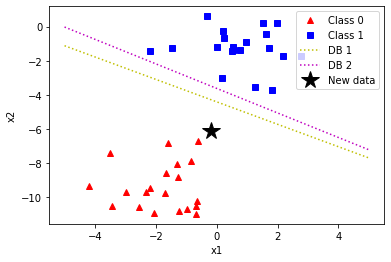

In [34]:
# Create linear descision boundary
m2       = -weights1/weights2
b2       = -weights0/weights2
zz       = m2*xx + b2

# Plotting training data
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'r^', label='Class 0')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs', label='Class 1')
plt.plot(xx, yy, 'y:',  label='DB 1')
plt.plot(xx, zz, 'm:',  label='DB 2')
plt.plot(x1new, x2new, '*k', markersize=18, label='New data')

plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()


Plot number of misclassified observations is each epoch

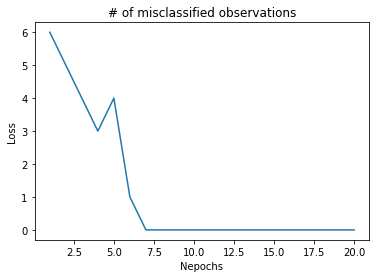

In [36]:
# Plot number of misclassified observations is each epoch
plt.plot(range(1, Nepochs+1, 1), NmissPerEpoch)
plt.xlabel("Nepochs")
plt.ylabel("Loss")
plt.title('# of misclassified observations')
plt.show()


# Final remarks

The perceptron model:

- is a ML model that mimics the neuron in the human brain

- consists of ...

- learns the weights using a traning dataset and a learning rule that minimizes the square error

- is a linear classifier used for binary classification problems and cannot separate data that are not linearly separable



# Activity

1. Implement the gradient descent method for a linear model

1. Implement the gradient descent method for a logistic regression model
